In [162]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

In [163]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [164]:
df.head(8)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


In [165]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [166]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:xlabel='R', ylabel='W'>

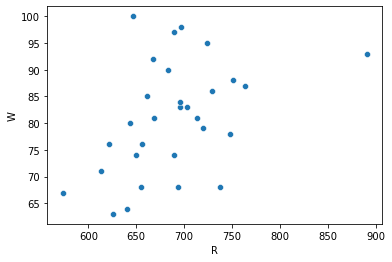

In [167]:
sns.scatterplot(x='R',y='W',data=df)

<AxesSubplot:xlabel='AB', ylabel='W'>

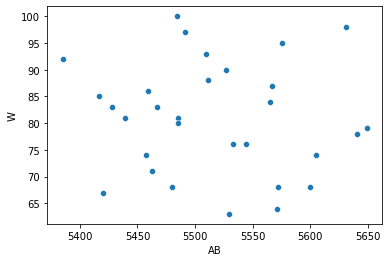

In [168]:
sns.scatterplot(x='AB',y='W',data=df)

<AxesSubplot:xlabel='H', ylabel='W'>

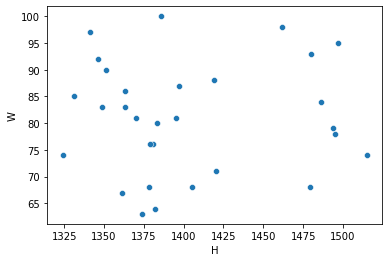

In [169]:
sns.scatterplot(x='H',y='W',data=df)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<AxesSubplot:xlabel='2B', ylabel='W'>

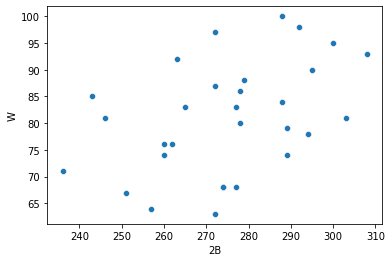

In [171]:
sns.scatterplot(x='2B',y='W',data=df)

<AxesSubplot:xlabel='RA', ylabel='W'>

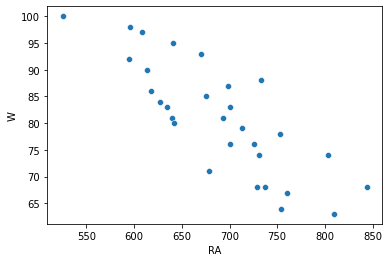

In [172]:
sns.scatterplot(x='RA',y='W',data=df)

<AxesSubplot:xlabel='ER', ylabel='W'>

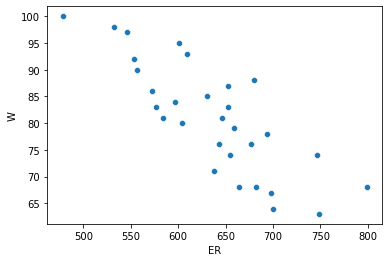

In [173]:
sns.scatterplot(x='ER',y='W',data=df)

<AxesSubplot:xlabel='3B', ylabel='W'>

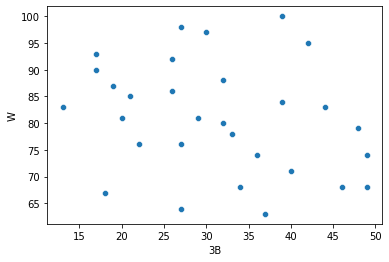

In [174]:
sns.scatterplot(x='3B',y='W',data=df)

<AxesSubplot:xlabel='HR', ylabel='W'>

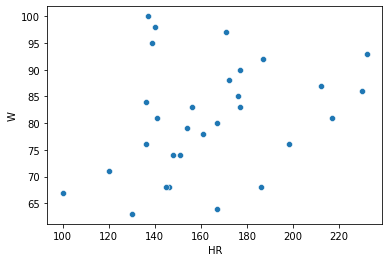

In [175]:
sns.scatterplot(x='HR',y='W',data=df)

<AxesSubplot:xlabel='BB', ylabel='W'>

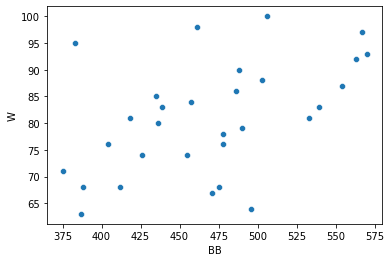

In [176]:
sns.scatterplot(x='BB',y='W',data=df)

<AxesSubplot:xlabel='SO', ylabel='W'>

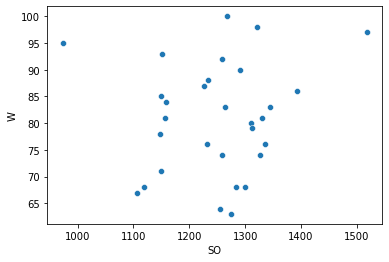

In [177]:
sns.scatterplot(x='SO',y='W',data=df)

<AxesSubplot:xlabel='SB', ylabel='W'>

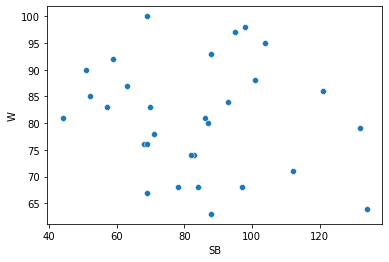

In [178]:
sns.scatterplot(x='SB',y='W',data=df)

<AxesSubplot:xlabel='ERA', ylabel='W'>

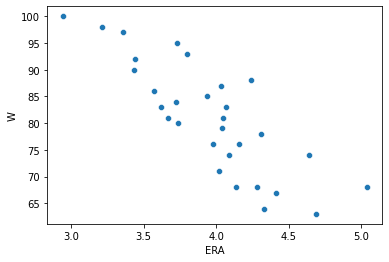

In [179]:
sns.scatterplot(x='ERA',y='W',data=df)

<AxesSubplot:xlabel='SHO', ylabel='W'>

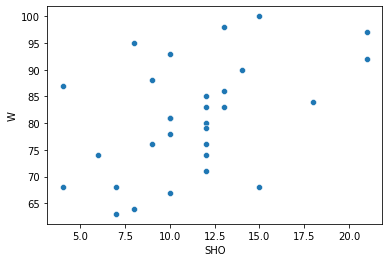

In [180]:
sns.scatterplot(x='SHO',y='W',data=df)

<AxesSubplot:xlabel='SV', ylabel='W'>

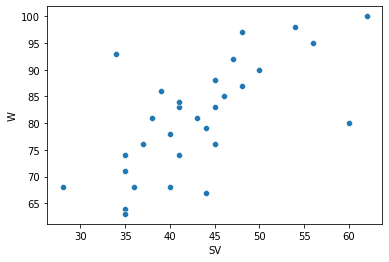

In [181]:
sns.scatterplot(x='SV',y='W',data=df)

<AxesSubplot:xlabel='E', ylabel='W'>

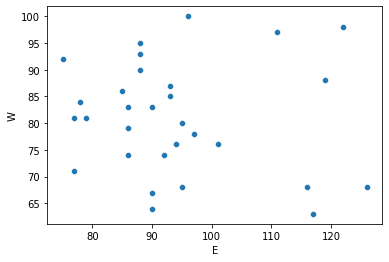

In [182]:
sns.scatterplot(x='E',y='W',data=df)

In [183]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

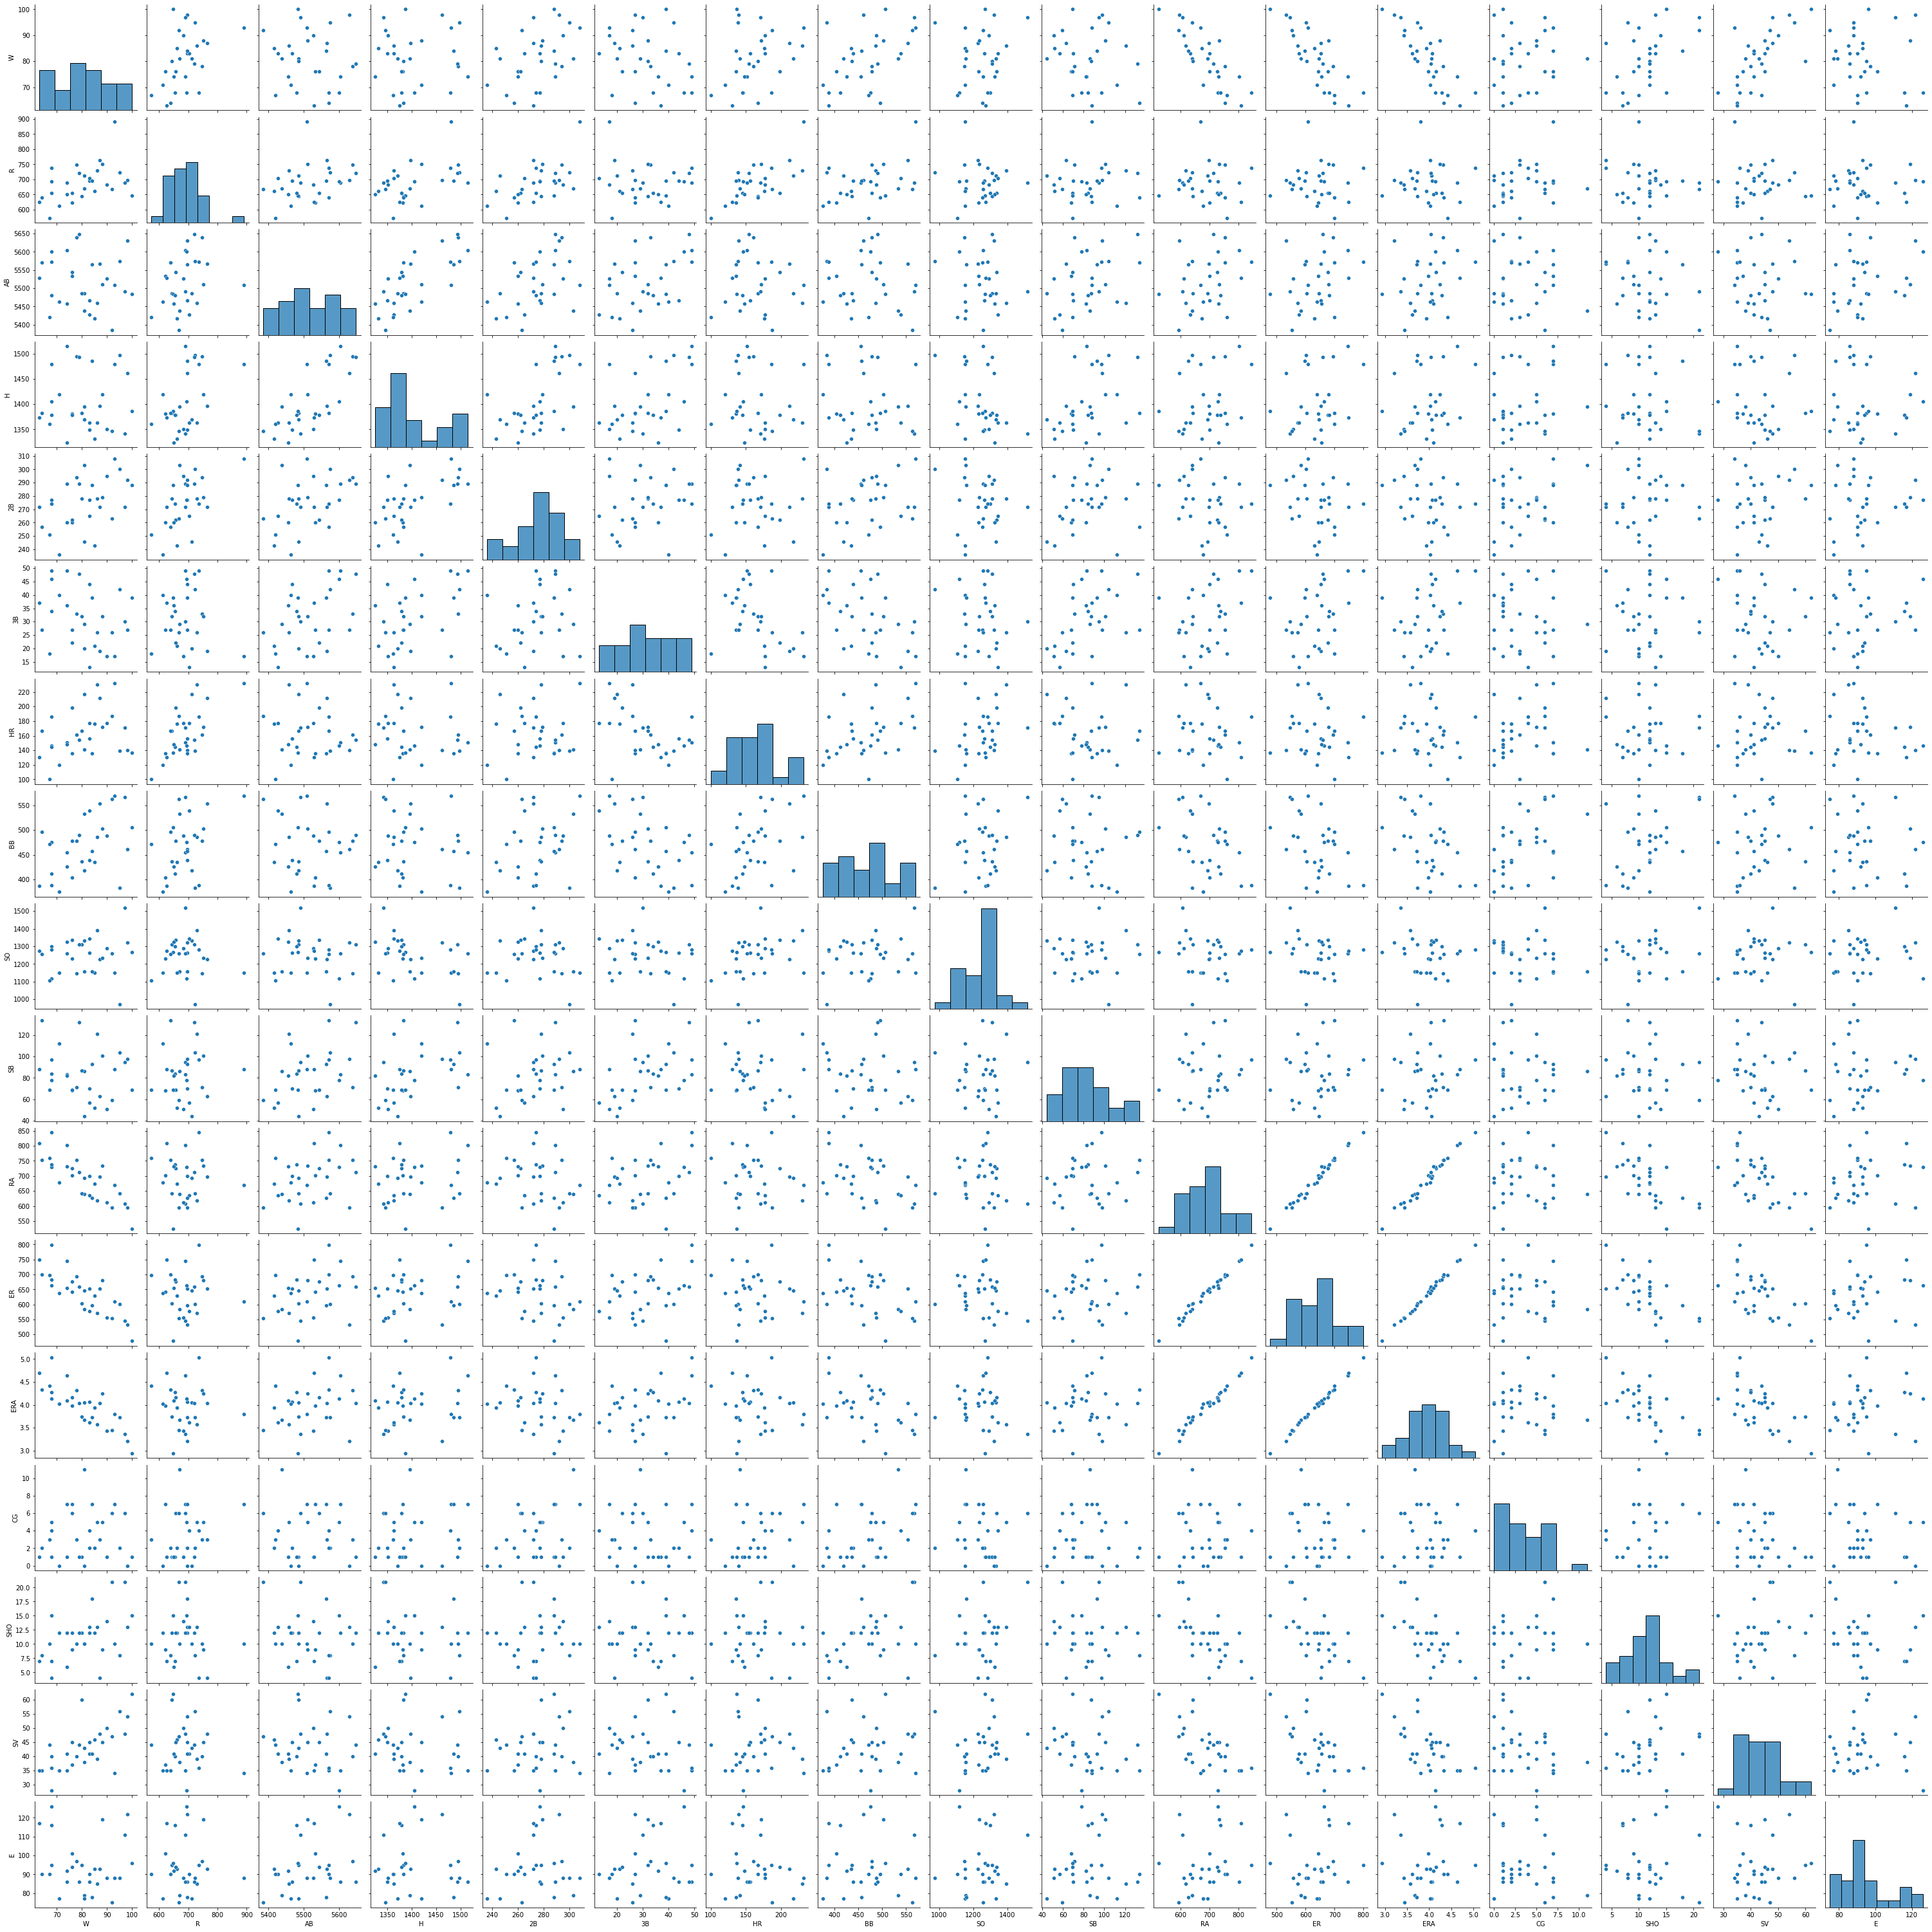

In [184]:
sns.pairplot(df)

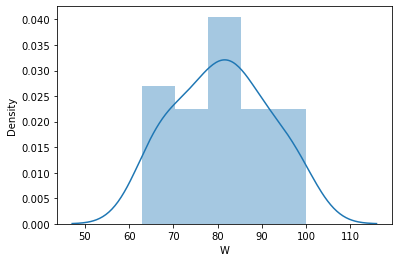

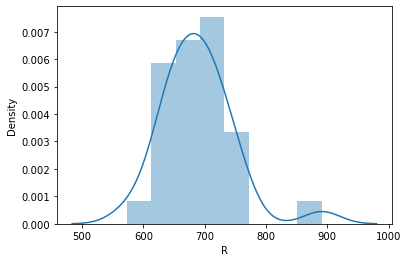

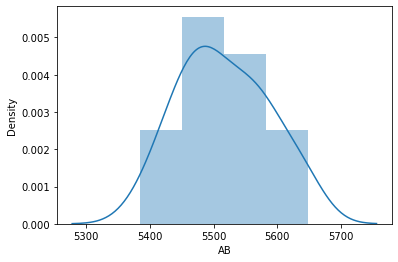

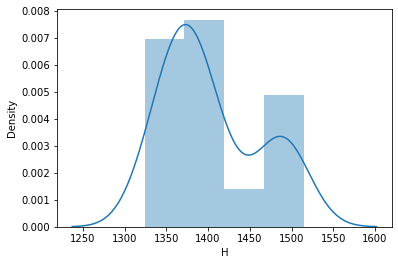

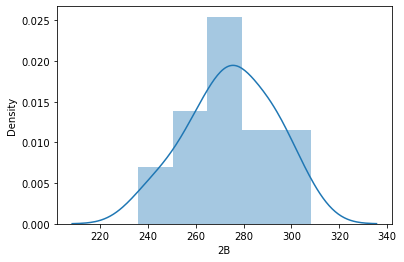

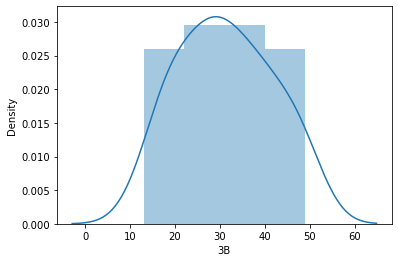

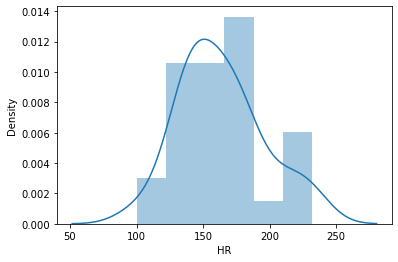

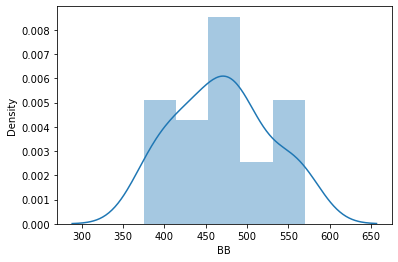

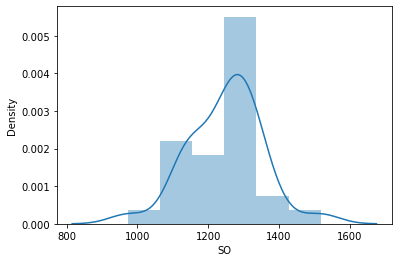

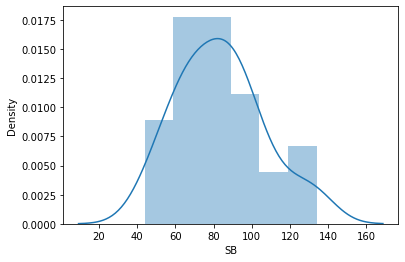

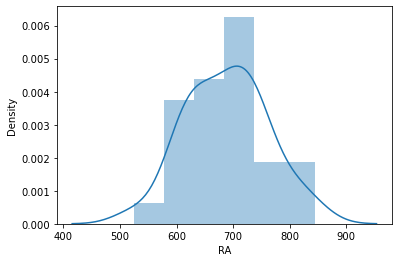

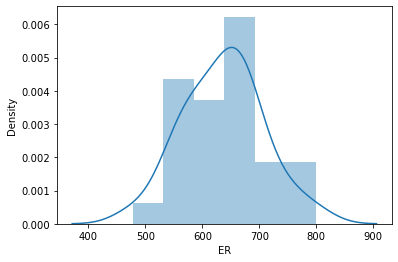

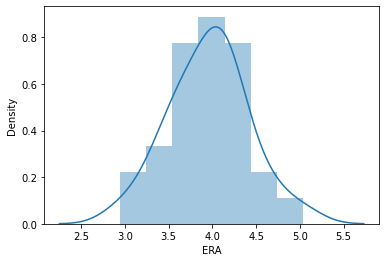

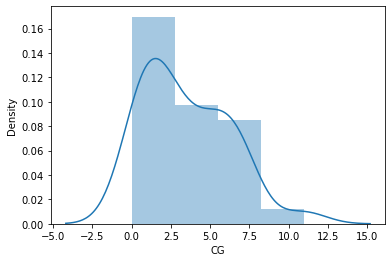

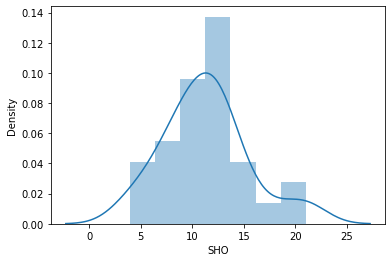

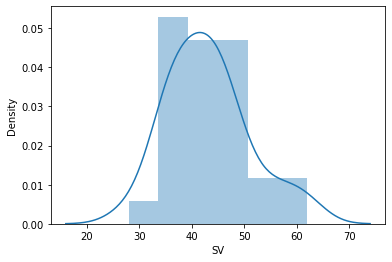

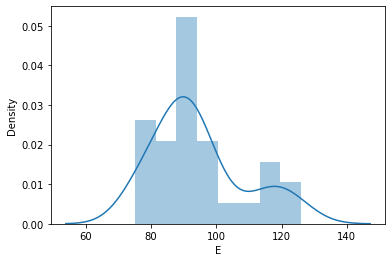

In [185]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

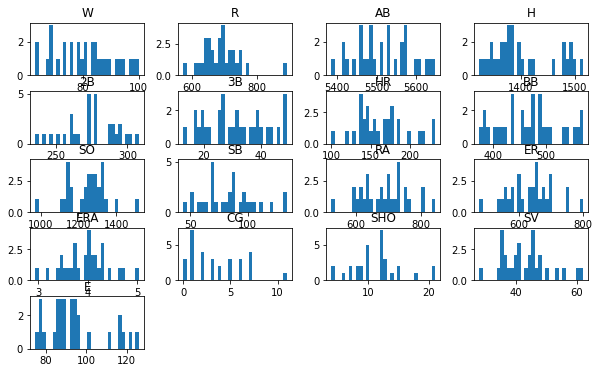

In [186]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [187]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

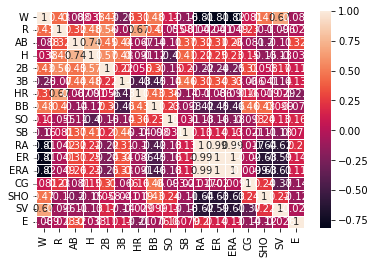

In [188]:
sns.heatmap(df.corr(),annot=True,linewidth=0.9)

In [189]:
df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

In [190]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [191]:
df['R']=np.log(df['R'])

<AxesSubplot:ylabel='Frequency'>

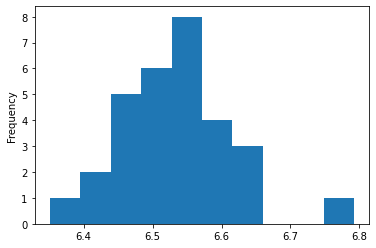

In [192]:
df['R'].plot.hist()

In [193]:
df['HR']=np.log(df['HR'])

<AxesSubplot:ylabel='Frequency'>

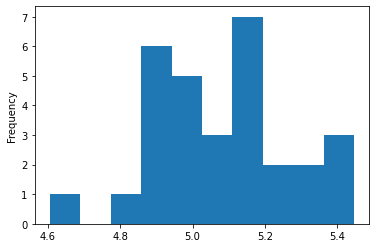

In [194]:
df['HR'].plot.hist()

In [195]:
df.skew()

W      0.047089
R      0.744196
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR    -0.013351
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [196]:
df['H']=np.log(df['H'])
df['H'].skew()

0.6285536261591038

In [197]:
df['SHO']=np.log(df['SHO'])

In [198]:
df['SV']=np.log(df['SV'])

In [199]:
df['E']=np.log(df['E'])

In [200]:
df.skew()

W      0.047089
R      0.744196
AB     0.183437
H      0.628554
2B    -0.230650
3B     0.129502
HR    -0.013351
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO   -0.721953
SV     0.150582
E      0.630080
dtype: float64

W         AxesSubplot(0.125,0.657941;0.0731132x0.222059)
R      AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
AB     AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
H      AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
2B     AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
3B     AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
HR     AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
BB     AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
SO     AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
SB        AxesSubplot(0.125,0.391471;0.0731132x0.222059)
RA     AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
ER     AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
ERA    AxesSubplot(0.388208,0.391471;0.0731132x0.222059)
CG     AxesSubplot(0.475943,0.391471;0.0731132x0.222059)
SHO    AxesSubplot(0.563679,0.391471;0.0731132x0.222059)
SV     AxesSubplot(0.651415,0.391471;0.0731132x0.222059)
E      AxesSubplot(0.739151,0.391471;0.0731132x0.222059)
dtype: object

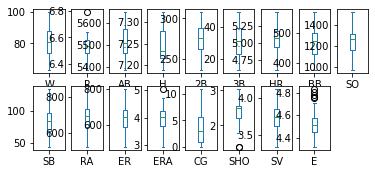

In [201]:
df.plot(kind='box',subplots=True,layout=(3,9))

In [202]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.584791,5575,7.311218,300,42,4.934474,383,973,104,641,601,3.73,2,2.079442,4.025352,4.477337
1,83,6.545350,5467,7.207119,277,44,5.049856,439,1264,70,700,653,4.07,2,2.484907,3.806662,4.454347
2,81,6.505784,5439,7.240650,303,29,4.948760,533,1157,86,640,584,3.67,11,2.302585,3.637586,4.369448
3,76,6.432940,5533,7.230563,260,27,4.912655,404,1231,68,701,643,3.98,7,2.197225,3.610918,4.615121
4,74,6.535241,5605,7.323171,289,49,5.017280,455,1259,83,803,746,4.64,7,2.484907,3.555348,4.454347
5,93,6.792344,5509,7.299797,308,17,5.446737,570,1151,88,670,609,3.80,7,2.302585,3.526361,4.477337
6,87,6.638568,5567,7.242082,272,19,5.356586,554,1227,63,698,652,4.03,3,1.386294,3.871201,4.532599
7,81,6.569481,5485,7.222566,246,20,5.379897,418,1331,44,693,646,4.05,0,2.302585,3.761200,4.343805
8,80,6.467699,5485,7.232010,278,32,5.117994,436,1310,87,642,604,3.74,1,2.484907,4.094345,4.553877
9,78,6.617403,5640,7.309881,294,33,5.081404,478,1148,71,753,694,4.31,3,2.302585,3.688879,4.574711


In [203]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [204]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.584791,5575,7.311218,300,42,4.934474,383,973,104,641,601,3.73,2,2.079442,4.025352,4.477337
1,83,6.545350,5467,7.207119,277,44,5.049856,439,1264,70,700,653,4.07,2,2.484907,3.806662,4.454347
2,81,6.505784,5439,7.240650,303,29,4.948760,533,1157,86,640,584,3.67,11,2.302585,3.637586,4.369448
3,76,6.432940,5533,7.230563,260,27,4.912655,404,1231,68,701,643,3.98,7,2.197225,3.610918,4.615121
4,74,6.535241,5605,7.323171,289,49,5.017280,455,1259,83,803,746,4.64,7,2.484907,3.555348,4.454347
6,87,6.638568,5567,7.242082,272,19,5.356586,554,1227,63,698,652,4.03,3,1.386294,3.871201,4.532599
7,81,6.569481,5485,7.222566,246,20,5.379897,418,1331,44,693,646,4.05,0,2.302585,3.761200,4.343805
8,80,6.467699,5485,7.232010,278,32,5.117994,436,1310,87,642,604,3.74,1,2.484907,4.094345,4.553877
9,78,6.617403,5640,7.309881,294,33,5.081404,478,1148,71,753,694,4.31,3,2.302585,3.688879,4.574711
10,88,6.621406,5511,7.257708,279,32,5.147494,503,1233,101,733,680,4.24,5,2.197225,3.806662,4.779123


In [205]:
df.shape

(30, 17)

In [206]:
df_new.shape

(29, 17)

In [207]:
df_new.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [208]:
x=df_new.iloc[:,-16:]
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.584791,5575,7.311218,300,42,4.934474,383,973,104,641,601,3.73,2,2.079442,4.025352,4.477337
1,6.545350,5467,7.207119,277,44,5.049856,439,1264,70,700,653,4.07,2,2.484907,3.806662,4.454347
2,6.505784,5439,7.240650,303,29,4.948760,533,1157,86,640,584,3.67,11,2.302585,3.637586,4.369448
3,6.432940,5533,7.230563,260,27,4.912655,404,1231,68,701,643,3.98,7,2.197225,3.610918,4.615121
4,6.535241,5605,7.323171,289,49,5.017280,455,1259,83,803,746,4.64,7,2.484907,3.555348,4.454347
6,6.638568,5567,7.242082,272,19,5.356586,554,1227,63,698,652,4.03,3,1.386294,3.871201,4.532599
7,6.569481,5485,7.222566,246,20,5.379897,418,1331,44,693,646,4.05,0,2.302585,3.761200,4.343805
8,6.467699,5485,7.232010,278,32,5.117994,436,1310,87,642,604,3.74,1,2.484907,4.094345,4.553877
9,6.617403,5640,7.309881,294,33,5.081404,478,1148,71,753,694,4.31,3,2.302585,3.688879,4.574711
10,6.621406,5511,7.257708,279,32,5.147494,503,1233,101,733,680,4.24,5,2.197225,3.806662,4.779123


In [209]:
y=df_new.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [210]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [257]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=50)

In [258]:
x_train.shape

(19, 16)

In [259]:
y_train.shape

(19,)

In [260]:
x_test.shape

(10, 16)

In [261]:
y_test.shape

(10,)

In [263]:
lr=LinearRegression()
knr=KNeighborsRegressor()
dtr=DecisionTreeRegressor()
svr=SVR()
model=[lr,knr,dtr,svr]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("predicted win:",m,predm)
    print("actual win:",m,y_test)
    print('error:')
    print('mean absolute error:',m,mean_absolute_error(y_test,predm))
    print('mean squared error:',m,mean_squared_error(y_test,predm))
    print('root mean squarred error:',m,np.sqrt(mean_squared_error(y_test,predm)))#

   

predicted win: LinearRegression() [ 79.97428247  80.60596604  77.17769909 104.37819033  77.98140471
  54.90495859  85.27449568  71.49652166  85.95303359  91.6708792 ]
actual win: LinearRegression() 29     68
9      78
28     74
10     88
18     68
19     64
25     92
20     90
15    100
21     83
Name: W, dtype: int64
error:
mean absolute error: LinearRegression() 10.115941233464309
mean squared error: LinearRegression() 127.09781386780128
root mean squarred error: LinearRegression() 11.273766622908303
predicted win: KNeighborsRegressor() [73.6 77.8 79.2 79.2 75.8 78.4 83.  86.2 85.8 81.2]
actual win: KNeighborsRegressor() 29     68
9      78
28     74
10     88
18     68
19     64
25     92
20     90
15    100
21     83
Name: W, dtype: int64
error:
mean absolute error: KNeighborsRegressor() 7.08
mean squared error: KNeighborsRegressor() 70.44000000000001
root mean squarred error: KNeighborsRegressor() 8.392854103342914
predicted win: DecisionTreeRegressor() [74. 67. 63. 63. 63. 63. 86